<a href="https://colab.research.google.com/github/PurushothamNaidu143/Machine-Learning-models/blob/main/car_price_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/cardata.csv")
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0


In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
dataset.shape

(299, 9)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [ ]:
dataset["Fuel_Type"].value_counts()

Petrol    238
Diesel     59
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
dataset["Seller_Type"].value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
dataset["Transmission"].value_counts()

Manual       259
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
dataset.replace({"Fuel_Type":{"Petrol":1,"Diesel":2,"CNG":3}},inplace=True)

In [ ]:
dataset.replace({"Seller_Type":{"Dealer":1,"Individual":2}},inplace=True)

In [ ]:
dataset.replace({"Transmission":{"Manual":1,"Automatic":2}},inplace=True)

In [ ]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...,...
294,amaze,2014,3.75,6.80,33019,1,1,1,0
295,city,2015,8.55,13.09,60076,2,1,1,0
296,city,2016,9.50,11.60,33988,2,1,1,0
297,brio,2015,4.00,5.90,60000,1,1,1,0


In [ ]:
x=dataset.drop(["Car_Name","Selling_Price"],axis=1)
y=dataset["Selling_Price"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictedvaluesbymodel1=model1.predict(x_test)

In [ ]:
r2score=r2_score(y_test,predictedvaluesbymodel1)
print("r2 score of model 1 is: ",r2score)

r2 score of model 1 is:  0.8756453656587911


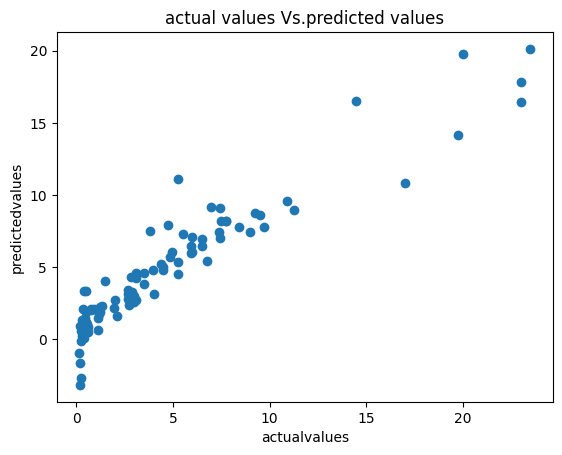

In [ ]:
plt.scatter(y_test,predictedvaluesbymodel1)
plt.xlabel("actualvalues")
plt.ylabel("predictedvalues")
plt.title("actual values Vs.predicted values")
plt.show()

In [ ]:
new_year=int(input("enter the year of the model: "))
new_present_price=float(input("enter the present price of the car: "))
new_kms_driven=int(input("enter the distance it travelled: "))
new_fuel_type=int(input("enter the fuel type: "))
new_seller_type=int(input("enter the seller type: "))
new_transmission=int(input("enter the transmission type: "))
new_owner=int(input("enter the owners: "))
new_data_point=[new_year,new_present_price,new_kms_driven,new_fuel_type,new_seller_type,new_transmission,new_owner]
new_data_point = np.array(new_data_point).reshape(1, -1)
new_data_point_prediction_value=model1.predict(new_data_point)
print("selling price of this car is: ",new_data_point_prediction_value)

enter the year of the model: 2016
enter the present price of the car: 5.9
enter the distance it travelled: 5464
enter the fuel type: 1
enter the seller type: 1
enter the transmission type: 1
enter the owners: 0
selling price of this car is:  [4.94177613]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
